鸢尾花数据集或费舍尔的鸢尾花数据集是由英国统计学家、优生学家和生物学家罗纳德·费舍尔在他1936年的论文《在分类问题中使用多个测量值》中引入的一个多变量数据集，作为线性判别分析的示例。有时也被称为安德森的鸢尾花数据集，因为埃德加·安德森收集了这些数据来量化三个相关物种的鸢尾花形态变异。其中三个物种中有两个是从加斯佩半岛采集的，“全部来自同一牧场，在同一天采摘，并由同一人用相同仪器同时测量”。费舍尔的论文发表在《优生学年报》杂志上，对于今天继续使用鸢尾花数据集教授统计技术引起了争议。

该数据集包含每种鸢尾花（山鸢尾、弗吉尼亚州鸢尾和变色秋海棠）各50个样本。从每个样本中测得四个特征：萼片和花瓣的长度和宽度，以厘米为单位。基于这四个特征的组合，费舍尔开发了一个线性判别模型来区分不同的物种。

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

本研究尝试使用Kmeans对鸢尾花数据集进行聚类。

[属性信息：
](https://archive.ics.uci.edu/ml/datasets/iris)
1. 花萼长度（厘米）
2. 花萼宽度（厘米）
3. 花瓣长度（厘米）
4. 花瓣宽度（厘米）
5. 类别：
-- 山鸢尾
-- 变色鸢尾
-- 维吉尼亚鸢尾

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
iris = pd.read_csv("./data/iris/IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [4]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# 种类的频率分布
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

**Distribution plots
**

绘制成直方图。

/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


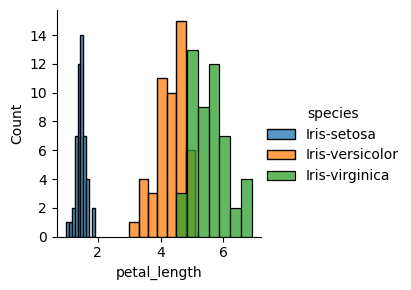

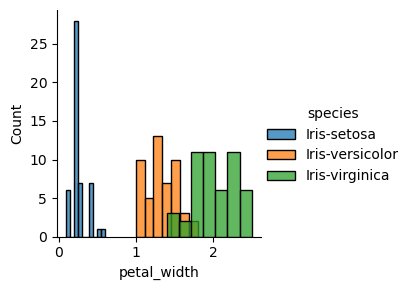

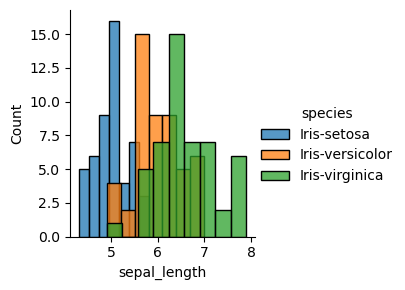

In [12]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()
plt.show()

box plot

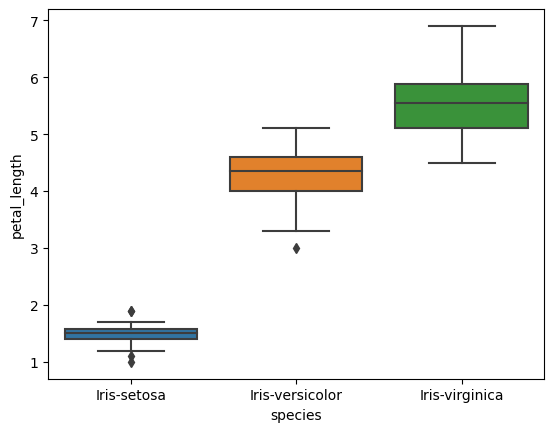

In [13]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

violin plot

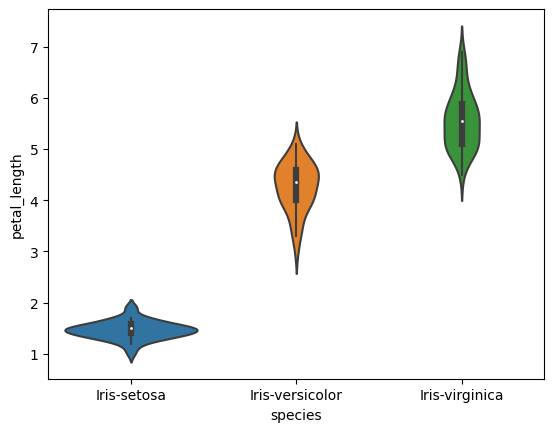

In [14]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

**Scatter plot**


/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


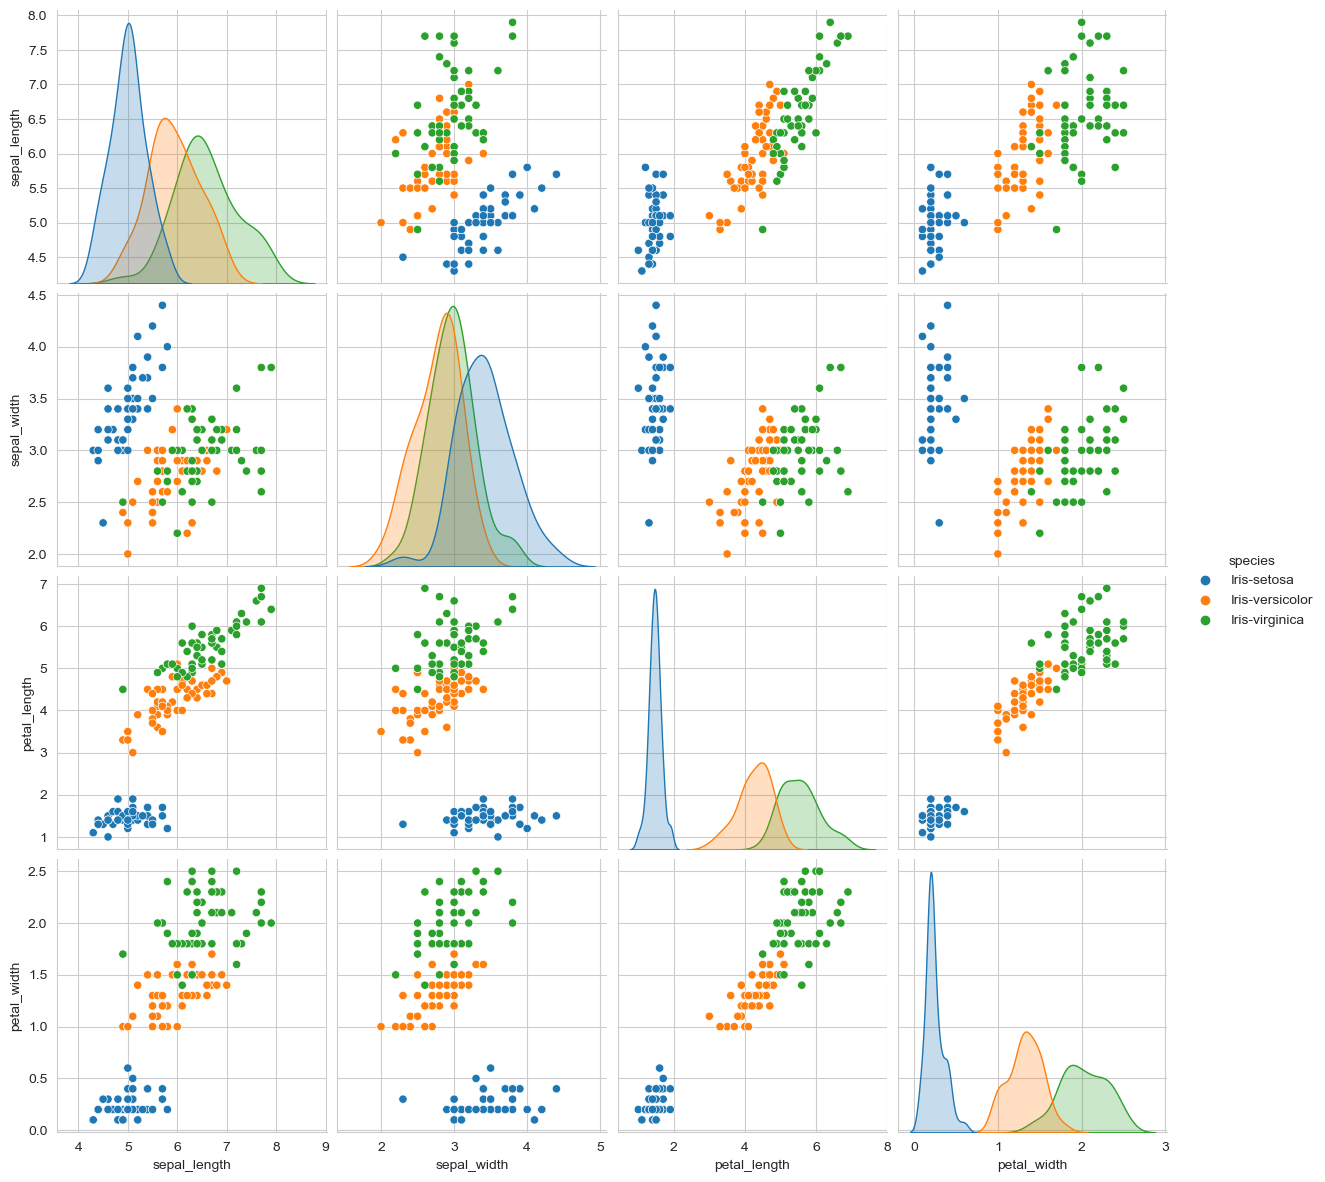

In [15]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) 是一种基于质心的算法，或者说是一种基于距离的算法，我们通过计算距离来将一个点分配到一个簇中。在K-Means中，每个簇都与一个质心相关联。

# 如何实现K-Means聚类？

* 选择簇的数量k
* 从数据中随机选择k个点作为质心
* 将所有点分配给最近的簇质心
* 重新计算新形成簇的质心
* 重复步骤3和4

In [16]:
# 寻找k-means分类的最佳聚类数
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# 使用肘部法确定k-means聚类的最佳簇数。

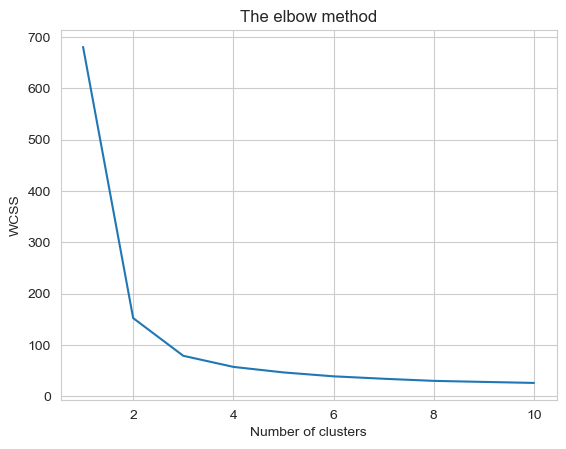

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # 簇内平方和
plt.show()

# 实施K-Means聚类算法

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

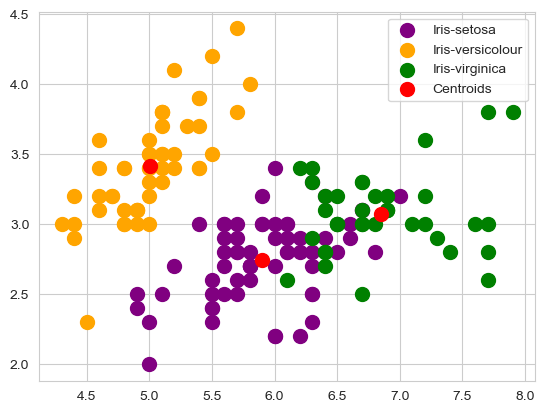

In [19]:
# 可视化聚类效果
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# 绘制聚类的质心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

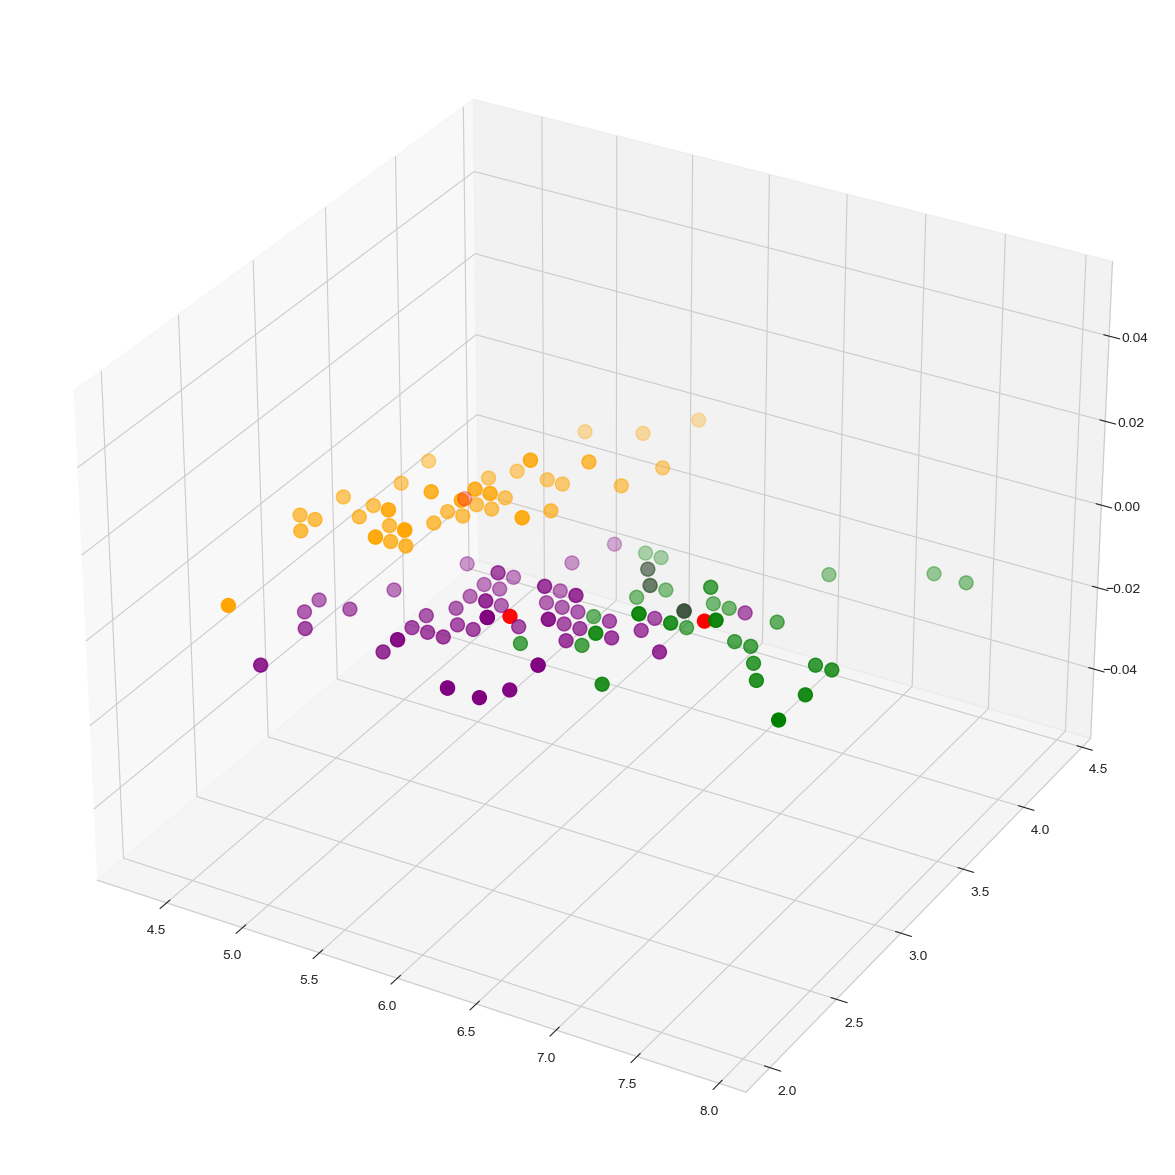

In [20]:
# 使用matplotlib绘制3D散点图

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# 绘制聚类的质心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()